In [25]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt 
import ipywidgets as widgets

In [26]:
filename = 'sales_data.csv'
df = pd.read_csv(filename,",")

df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### Inserindo coluna de total da venda

In [27]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


### Gráfico de total de vendas por mês

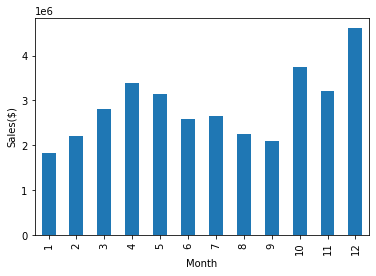

In [28]:
ax = df.groupby (['Month']).sum() ['Sales'].plot(kind='bar')
plt.ylabel('Sales($)')
plt.xlabel('Month')
plt.show ()

In [29]:
city = widgets.Dropdown(name = 'City')

In [30]:
list (df.City.unique())

['Dallas  (TX)',
 'Boston  (MA)',
 'Los Angeles  (CA)',
 'San Francisco  (CA)',
 'Seattle  (WA)',
 'Atlanta  (GA)',
 'New York City  (NY)',
 'Portland  (OR)',
 'Austin  (TX)',
 'Portland  (ME)']

In [31]:
wid_city = widgets.Dropdown(name='city')

In [32]:
wid_city.options = list (df.City.unique())

### Criando seletor de Cidades

In [33]:
wid_city

Dropdown(options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)', 'San Francisco  (CA)', 'Seattle  (WA)',…

In [34]:
wid_city.value

'Dallas  (TX)'

### Gráfico de vendas pela cidade escolhida

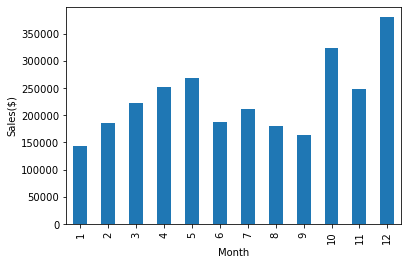

In [35]:
df_tmp =df[df['City']==wid_city.value].copy()
ax = df_tmp.groupby (['Month']).sum() ['Sales'].plot(kind='bar')
plt.ylabel('Sales($)')
plt.xlabel('Month')
plt.show ()

### Gráfico interativo de vendas por cidade e produto

In [36]:
wid_city = widgets.Dropdown(name='city')
wid_city.options = list (df.City.unique())

wid_product = widgets.Dropdown(name='product')
wid_product.options = list(df.Product.unique())

def func (city,product):
    
    df_tmp = df[df['City'] == wid_city.value].copy()
    df_tmp = df_tmp[df_tmp['Product'] == wid_product.value]
        
    ax = df_tmp.groupby(['Month']).sum()['Sales'].plot(kind='bar')
    plt.ylabel('Sales($)')
    plt.xlabel('Month')
    plt.show()
    
interactive_plot = widgets.interactive(func, city=wid_city, product=wid_product)
    
output = interactive_plot.children[-1]
output.layout.height = '350px'
    
interactive_plot

interactive(children=(Dropdown(description='city', options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)…

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [97]:
filter = ['Product','Price Each','Quantity Ordered']
dt = df.filter(items= filter)
prod = dt.groupby(['Product']).sum()
prod['Sales'] = prod['Quantity Ordered'] * prod['Price Each']
prod.loc[prod['Quantity Ordered'] < 1000, 'Meta'] = '0'
prod.loc[prod['Quantity Ordered'] > 1000, 'Meta'] = '1'
prod

,Price Each,Quantity Ordered,Sales,Meta
Product,,,,
20in Monitor,451068.99,4129,1.862464e+09,1
27in 4K Gaming Monitor,2429637.70,6244,1.517066e+10,1
27in FHD Monitor,1125974.93,7550,8.501111e+09,1
34in Ultrawide Monitor,2348718.19,6199,1.455970e+10,1
AA Batteries (4-pack),79015.68,27635,2.183598e+09,1
AAA Batteries (4-pack),61716.59,31017,1.914263e+09,1
Apple Airpods Headphones,2332350.00,15661,3.652693e+10,1
Bose SoundSport Headphones,1332366.75,13457,1.792966e+10,1
Flatscreen TV,1440000.00,4819,6.939360e+09,1


### Previsão de meta de vendas

In [105]:
X = prod.drop('Meta', 1)
y = prod['Meta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm = LogisticRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)

dis = pd.DataFrame(y_test)
dis['Pred'] = pred

dis

,Meta,Pred
Product,,
Flatscreen TV,1,1
Apple Airpods Headphones,1,1
20in Monitor,1,1
AAA Batteries (4-pack),1,1
iPhone,1,1
Lightning Charging Cable,1,1
